# Numpy

## Creating Arrays
A numpy array is a grid of values, all of the same type.

We can initialize numpy arrays from nested Python lists

In [2]:
import numpy as np

a = np.array([1, 2, 3])   # Create a rank 1 array
print(type(a))            
print(a.shape)            
print(a[0], a[1], a[2])   
a[0] = 5                  
print(a)                  

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]


In [3]:
b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b.shape)
print(b)
print(b[0, 0], b[0, 1], b[1, 0])  

(2, 3)
[[1 2 3]
 [4 5 6]]
1 2 4


Data types of elements of array

In [4]:
a = np.array([1, 2, 3])
b = np.array([1.1, 2, 3])
print(a.dtype)
print(b.dtype)

int32
float64


Numpy also provides many functions to create arrays:

In [5]:
np.zeros((2, 2))   # Create an array of all zeros

array([[0., 0.],
       [0., 0.]])

In [6]:
np.ones((1, 2))    # Create an array of all ones

array([[1., 1.]])

In [7]:
np.full((2, 2), 7)  # Create a constant array

array([[7, 7],
       [7, 7]])

In [8]:
np.eye(2)           # Create a 2x2 identity matrix

array([[1., 0.],
       [0., 1.]])

In [9]:
np.random.random((2, 3))  # Create an array filled with random values

array([[0.46021805, 0.8193889 , 0.9723466 ],
       [0.1222088 , 0.68410602, 0.30389121]])

In [10]:
np.arange(0, 2, 0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

In [11]:
np.linspace(0, 5/3, 5)

array([0.        , 0.41666667, 0.83333333, 1.25      , 1.66666667])

## Indexing and slicing

In [12]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)
print(a[0, 1])       #indexing  -- same as a[0][1]

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
2


A slice of an array is a view into the same data, so modifying it
will modify the original array. (반면, List의 slice는 shallow copy이기 때문에 original list의 element는 변경되지 않는다.)

In [13]:
b = a[:2, 1:3]     # slicing
print(b)
b[0, 0] = 77   # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])  

[[2 3]
 [6 7]]
77


Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array

In [14]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)
print(a[1])
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape) 
print(row_r2, row_r2.shape)  

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[5 6 7 8]
[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)


## Array math

In [15]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)
print(x)
print()
print(y)

[[1. 2.]
 [3. 4.]]

[[5. 6.]
 [7. 8.]]


In [16]:
# Elementwise sum
print(x + y)      # print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]


In [17]:
# Elementwise difference
print(x - y)      # print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]


In [18]:
# Elementwise product
print(x * y)      # print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]


In [19]:
# Elementwise division
print(x / y)      # print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [20]:
# Elementwise square root
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Dot product

In [21]:
v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))    # print(np.dot(v, w))

219


In [22]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))    # print(np.dot(x, v))

[29. 67.]


In [23]:
# Matrix / matrix product; both produce the rank 2 array
print(x.dot(y))    # print(np.dot(x, y))

[[19. 22.]
 [43. 50.]]


More operations ...

In [35]:
x = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(x) 

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [25]:
print(np.sum(x))  # Compute sum of all elements
print(np.sum(x, axis=0))  # Compute sum of each column
print(np.sum(x, axis=1))  # Compute sum of each row

78
[15 18 21 24]
[10 26 42]


In [26]:
print(x.T)     # Transpose of x

[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]


## Broadcasting

In [27]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Using broadcasting

In [28]:
y = x + v  # Add v to each row of x using broadcasting
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


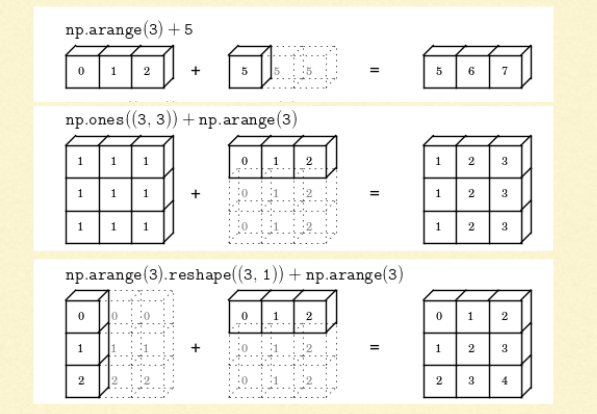)

## Interger array indexing

In [29]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [30]:
b = a[[2, 1]]
print(b)

[[ 9 10 11 12]
 [ 5  6  7  8]]


## Boolean array indexing

In [31]:
print(a > 5)

[[False False False False]
 [False  True  True  True]
 [ True  True  True  True]]


In [32]:
a[a > 5]        # array elements of the True values

array([ 6,  7,  8,  9, 10, 11, 12])